### Outlier Detection

##### Outlier detection with Local Outlier Factor (LOF)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# default plot settings
plt.rcParams['figure.figsize'] = [15, 10]
print(__doc__)

np.random.seed(42)

Automatically created module for IPython interactive environment


In [9]:
# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_inliers = pd.DataFrame(X_inliers, columns = ['x1', 'x2'])
# Generating outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])
X = np.r_[X_inliers, X_outliers]

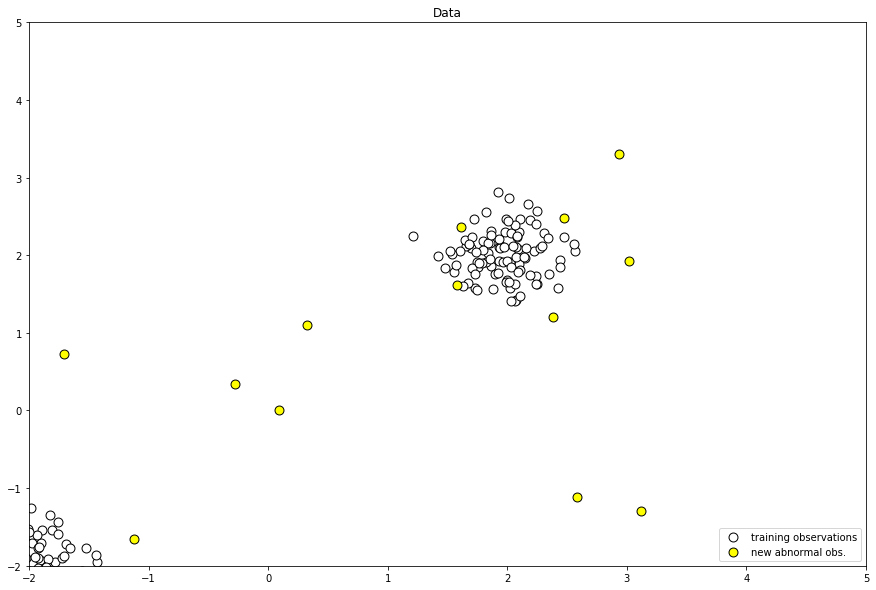

In [10]:
# Plotting generated data ----

plt.title("Data")

p1 = plt.scatter(X_inliers.x1, X_inliers.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.x1, X_outliers.x2, c='yellow',
                s=20*4, edgecolor='k')


plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2],
           ["training observations",
            "new abnormal obs.",
            ],
           loc="lower right")

plt.show()

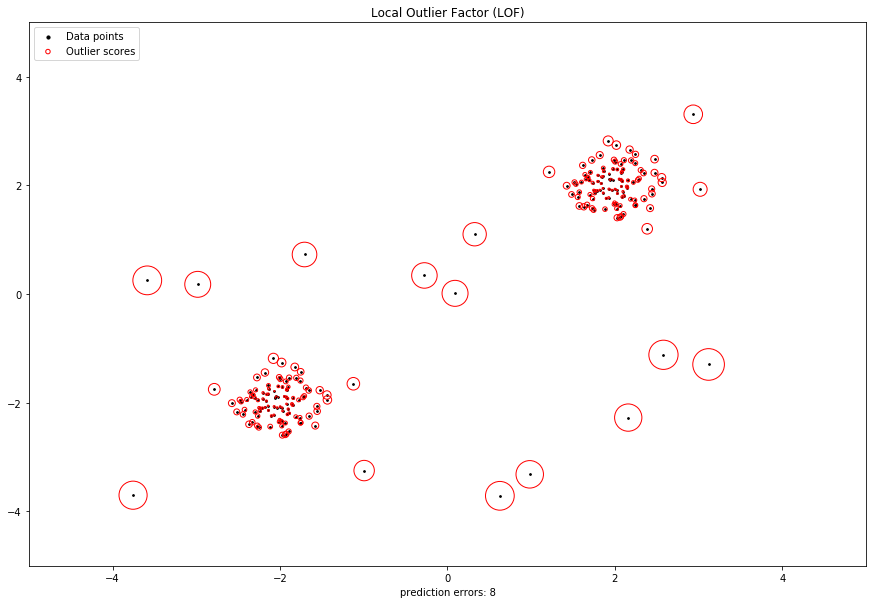

In [11]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()